#Diffie-Hellman Key Exchange

##Concepts

Two people, A and B, need to send messages across an untrusted channel. They want to
encrypt their messages so that anyone who intercepts the message cannot read
the cleartext. They need a way to exchange a secret key without leaking the
key across the untrusted channel.

The algorithm can be visualized with the following metaphor. A and B
agree to use a standard which includes a shared value, a common paint color. They add their secret formula to the shared color and send the tinted colors to each other across a public transport channel. They both add their secret formulas to the mixtures they receive in order to get the same secret mixture without leaking their individual secret formulas to the public.

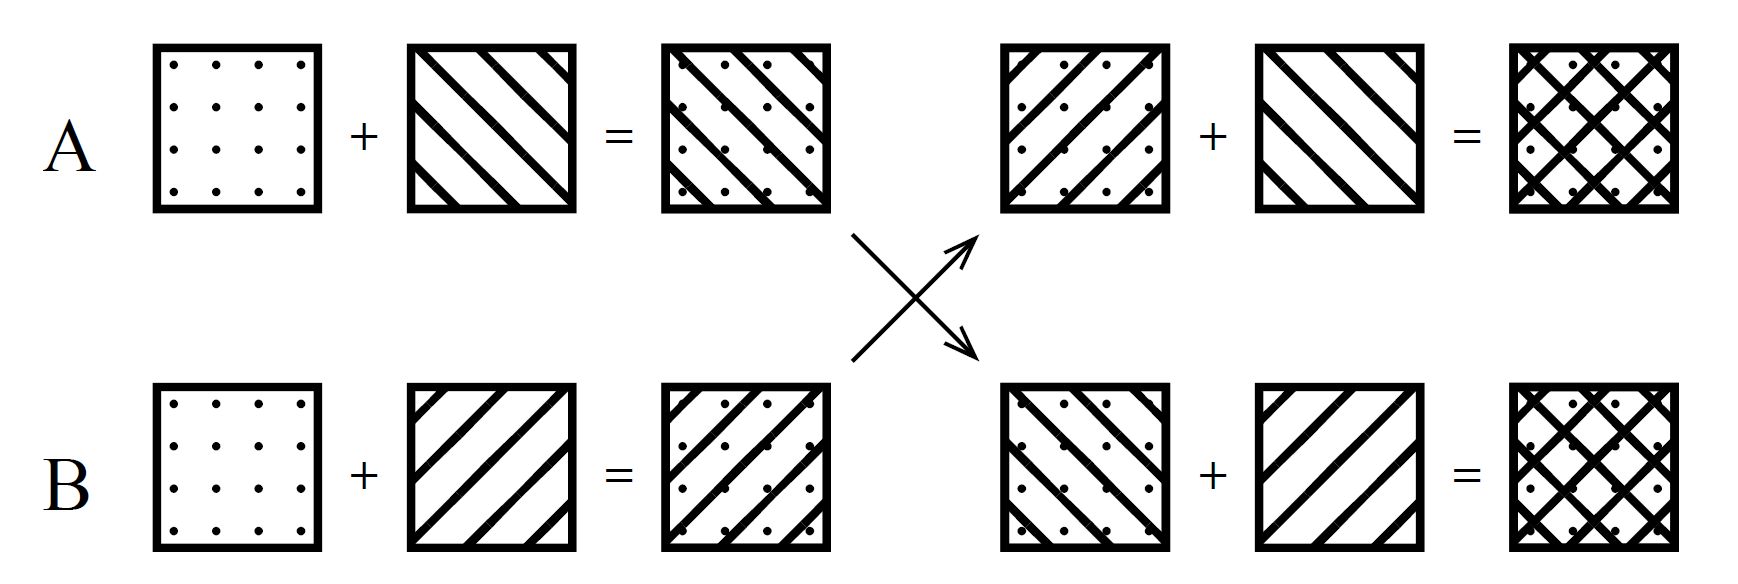
[Image by Kristen Gilden, CC BY-SA 4.0]("https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange")

###Why does this work?
To understand this metaphor in math terms, define the following:
 - $g$ and $p:$ common paint, $p$ prime, $g$ a standard value called the 'generator'
 - $a$ and $b:$ secret colors, large random integers

Alice keeps the value of $a$ secret. Bob keeps $b$ secret. They agree on the values $g$ and $p$ that make up the common paint.

The strength of this protocol is due to the fact that $g^{ab}\mod p = g^{ba}\mod p$ and is computationally expensive, or thought to be impossible on reasonable time scales to derive the individual secret values $a$ and $b$ if only $p$, $g$, $g^{a} \mod p$, and $g^{b}\pmod p$ can be observed on the wire.

$g^{a}\pmod p$ is called $A$ and $g^{b}\pmod p$ is called $B$ and $A$ and $B$ are what can be sent across an untrusted channel.

####Math detail
In modular math, exponents are commutative when the modulus is a prime number and both the exponent and base are relatively prime to the modulus. This principle is called the Euler Totient Theorem and holds only for fundamental numbers, primes.

Deriving the secret components of this protocol requires solving for an exponent given standard bases and moduli. The solution requires calculating a discrete logarithm for which there is no known speed up faster than trial and error.

## What does it look like in code?

In [ ]:
import random
from sympy import isprime

g = 2 #Typical generator
primes = [i for i in range(2**20,2**21) if isprime(i)]
p = random.choice(primes) # Add a random, large prime to the parameters

# Alice generates a random secret, a
a = random.randint(1,p-2)

# Separately, Bob generates a random secret, b
b = random.randint(1,p-2)

A = (g**a)%p
B = (g**b)%p

print(f"Alice and Bob communicate to agree on common params, g={g}, p={p}")
print(f"Alice secretly chooses a={a} and sends A=g^a mod p={A} to Bob")
print(f"Bob secretly chooses b={b} and sends B=g^b mod p={B} to Alice")

s = (B**a)%p
print(f"Alice computes a shared secret key as s=(B^a) mod p={s}")
s = (A**b)%p
print(f"Bob computes a shared secret key as s=(A^b) mod p={s}")